In [299]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import os

**GENERATING 2D, 3D AND 2D/3D FILTER**

In [300]:
_2D_lst = []
_3D_lst = []
_2D_3D_lst = []

# # 2D file reading
# with open("./matrix_2D.txt", mode='r') as _2D_in:
#     for line in _2D_in.readlines():
#         line_splt = line.split()
#         _2D_lst.append([int(line_splt[3]), int(line_splt[8]) / (1024*1024), int(line_splt[11]) / (1024*1024)])

# # 3D file reading
# with open("./matrix_3D.txt", mode='r') as _3D_in:
#     for line in _3D_in.readlines():
#         line_splt = line.split()
#         _3D_lst.append([int(line_splt[3]), int(line_splt[8]) / (1024*1024), int(line_splt[11]) / (1024*1024)])

# 2D_3D file reading
# with open("./matrix_2D_3D.txt", mode='r') as _2D_3D_in:
    # for line in _2D_3D_in.readlines():
        # line_splt = line.split()
        # _2D_3D_lst.append([int(line_splt[3]), int(line_splt[8]) / (1024*1024), int(line_splt[11]) / (1024*1024)])

In [301]:
init_size = [_2D_lst[i][1] for i in range(len(_2D_lst))] # same for 03 files, 
matrix_size = [_2D_lst[i][0] for i in range(len(_2D_lst))] # same for 03 files

_2D_filtred_size = [_2D_lst[i][2] for i in range(len(_2D_lst))]
_3D_filtred_size = [_3D_lst[i][2] for i in range(len(_3D_lst))]
# _2D_3D_filtred_size = [_2D_3D_lst[i][2] for i in range(len(_2D_3D_lst))]

In [302]:
_2D_filtred_size.sort()
_3D_filtred_size.sort()
# _2D_3D_filtred_size.sort()

In [303]:
# plt.figure(figsize=(2880*2/192, 1440*2/192), dpi=192)
# plt.style.use('fivethirtyeight')

# ax = plt.subplot()
# ax.plot(matrix_size, init_size, c="#EC9706", label="initial size")
# ax.plot(matrix_size, _2D_filtred_size, c="#3C8BEC", label="2D Filter size") 
# ax.plot(matrix_size, _3D_filtred_size, c="#FC2214", label="3D Filter size") 
# ax.plot(matrix_size, _2D_3D_filtred_size, c="#1AA137", label="2D/3D Filter size")

# ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc="upper left")

In [ ]:
# the victory cell here !!

if min(_2D_filtred_size) < min(init_size):
    print("2D passed")

if min(_3D_filtred_size) < min(init_size):
    print("3D passed")

<h4>plot Shannon entropy corresponding to 2D, 3D, 2D/3D filter, with variadic matrix size</h4>

In [ ]:
matrix_size = []
_2D_entropy = []
_3D_entropy = []
_2D_3D_entropy = []

init_entropy = [7.65934 for i in range(499)]

with open("./__2D_.txt") as input:
    for line in input.readlines():
            [mat_size, entropy] = line.split()
            matrix_size.append(float(mat_size))
            _2D_entropy.append(float(entropy))

with open("./__3D_.txt") as input:
    for line in input.readlines():
            [mat_size, entropy] = line.split()
            _3D_entropy.append(float(entropy))

with open("./__2D_3D_.txt") as input:
    for line in input.readlines():
            [mat_size, entropy] = line.split()
            _2D_3D_entropy.append(float(entropy))

# _3D_entropy.sort()

def reg(x):
    out = []
    for val in x:
        out.append(2.6264 + (16.1117 / val))
    return out

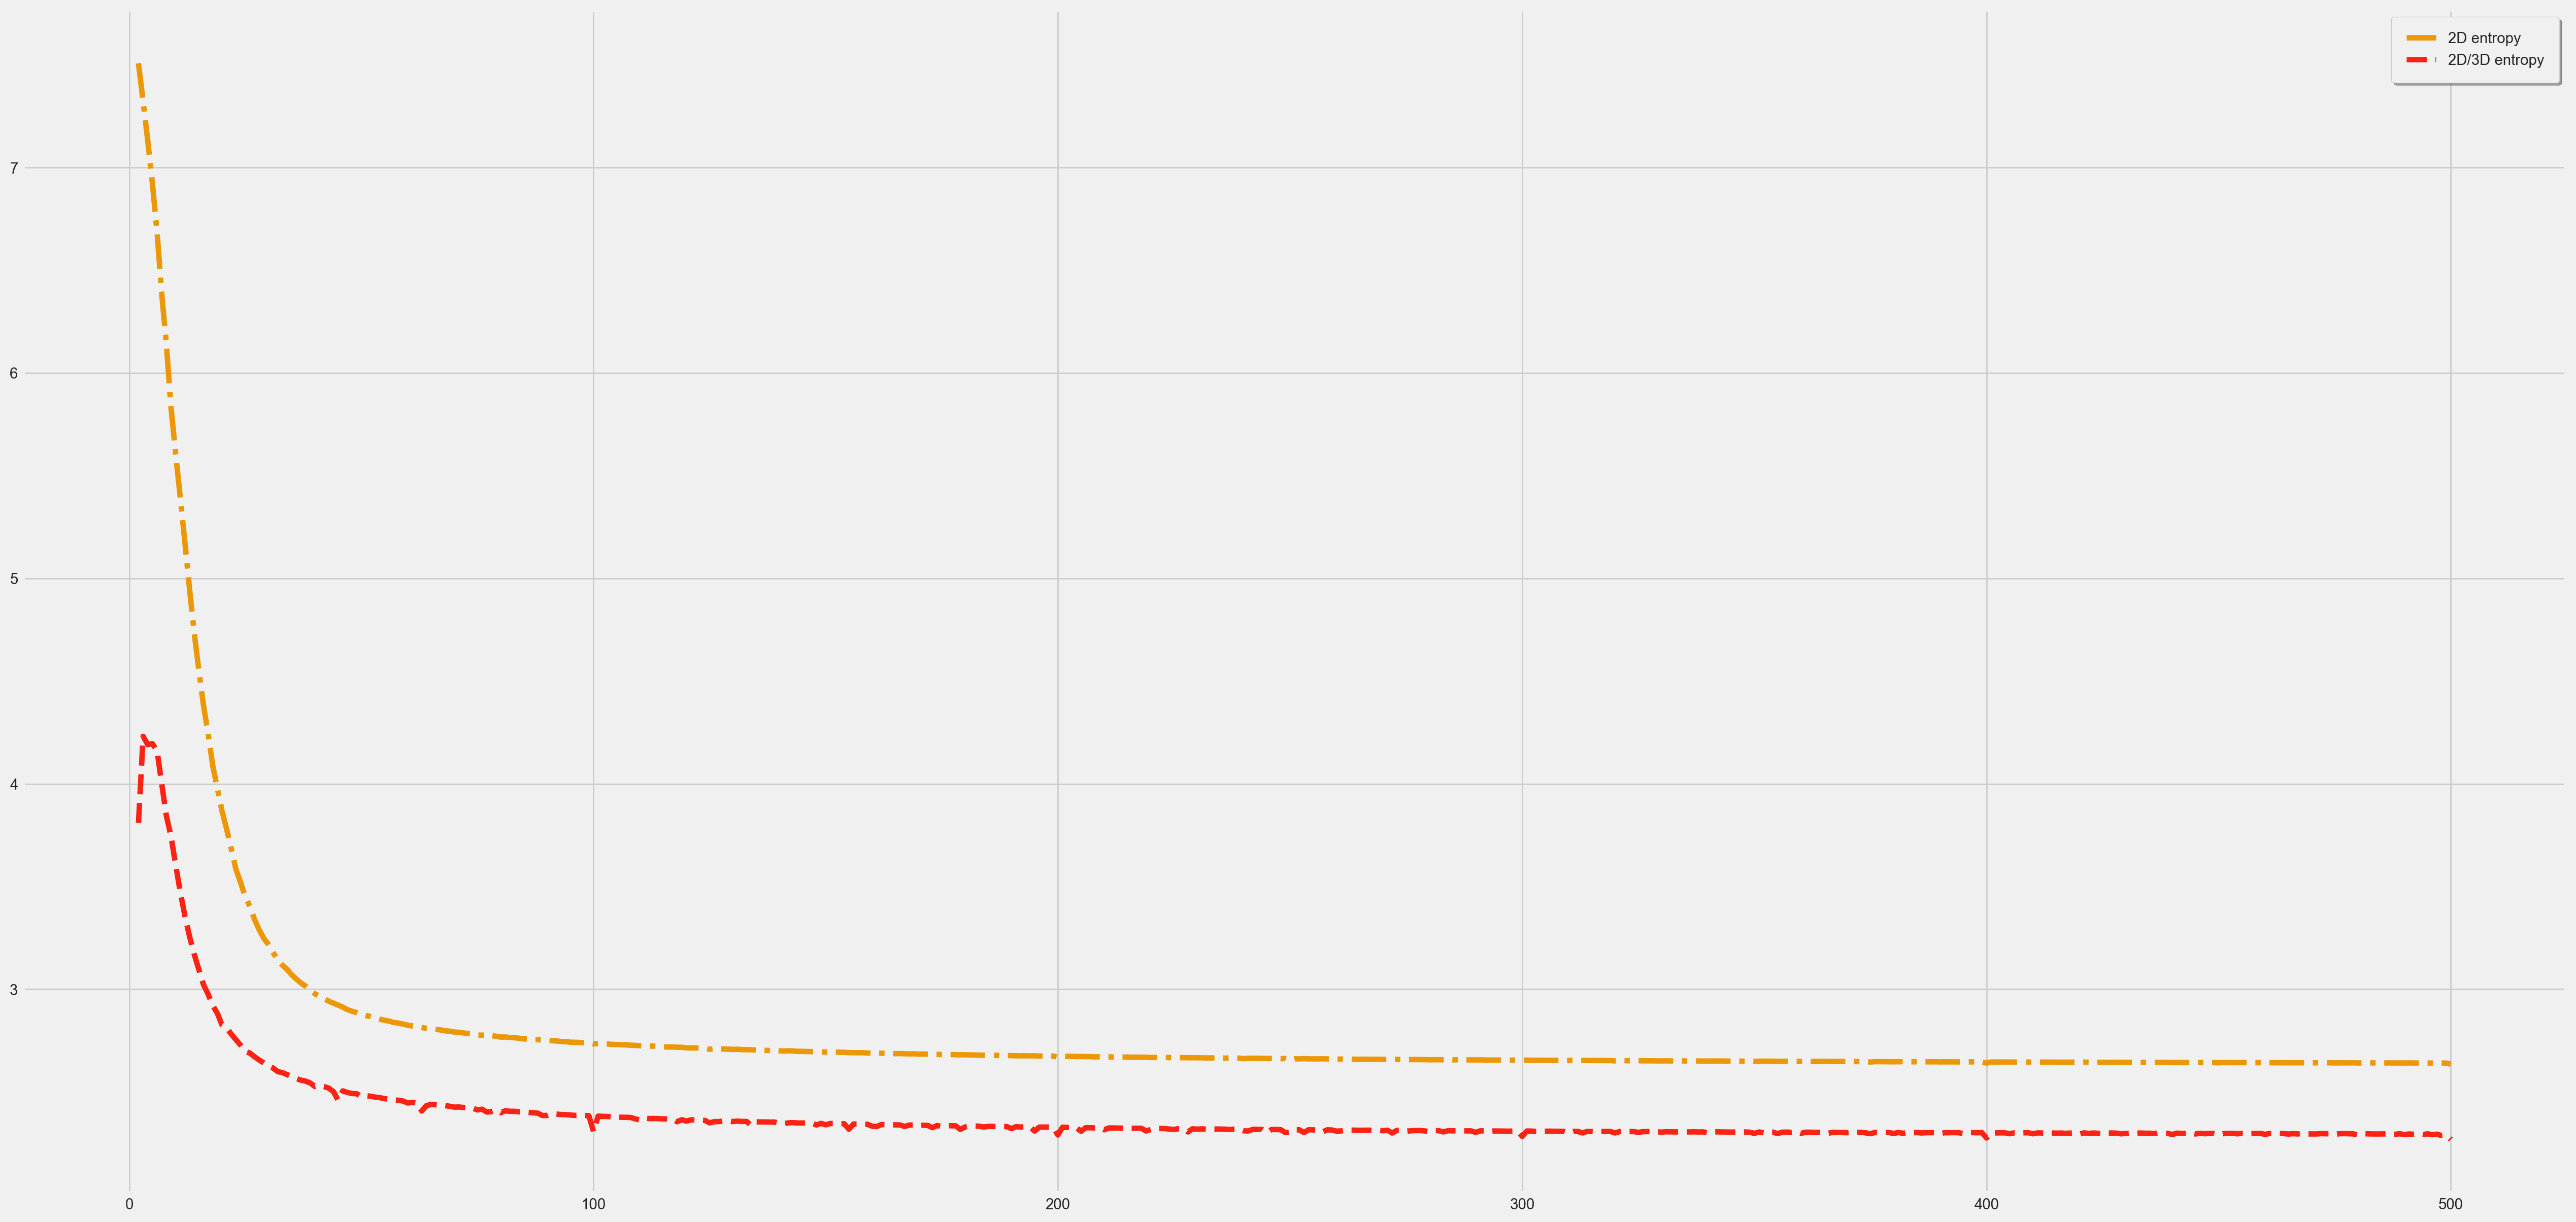

In [ ]:
plt.figure(figsize=(2880*2/192, 1440*2/192), dpi=192)
plt.style.use('fivethirtyeight')

ax = plt.subplot()
# ax.plot(matrix_size, init_entropy, c='#3C8BEC', label="initial entropy")
ax.plot(matrix_size, _2D_entropy, c='#EC9706', label="2D entropy", ls="-.")
# ax.plot(matrix_size, _3D_entropy, c='#1AA137', label="3D entropy", ls="dotted")
ax.plot(matrix_size, _2D_3D_entropy, c='#FC2214', label="2D/3D entropy", ls="--")
# ax.plot(matrix_size, reg(matrix_size), c='#3C8BEC', label="2D Regression", ls=":")
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc="upper right")

# ax.set_xlim(0, 300)
# ax.set_ylim(7.6, 8)

<h3>Evaluating Compress Ration with differents compressions Algorithms</h3>

In [305]:
# compressed ratios list
bz2 = []
gz = []
xz = []
rar = []
zip_deflate_64 = []
zip_deflate = []
zip_bz2 = []
zip_lzma = []
zip_ppmd = []
_7z_bz2 = []
_7z_lzma = []
_7z_lzma2 = []
_7z_ppmd = []

init_file_size = pathlib.Path(f"../bin/img_data.bin").stat().st_size / (1024 * 1024)

In [314]:
#os.listdir() return file names in lexicographic order : 2D-3D, 2D, 3D-2D, 3D, INITIAL
for file in os.listdir("../bin/"):

    file_size = pathlib.Path(f"../bin/{file}").stat().st_size / (1024 * 1024)# converting from byte to mo
    
    if file.find(".bz2") != -1:
        bz2.append(compress_ratio)

    elif file.find(".gz") != -1:
        gz.append(compress_ratio)

    elif file.find(".xz") != -1:
        xz.append(compress_ratio)
    
    elif file.find(".rar") != -1:
        rar.append(compress_ratio)

    elif file.find(".zip") != -1:
        if file.find("_64") != -1:
            zip_deflate_64.append(compress_ratio)
        if file.find("_Deflate") != -1:
            zip_deflate.append(compress_ratio)
        if file.find("_bz2") != -1:
            zip_bz2.append(compress_ratio)
        if file.find("_lzma") != -1:
            zip_lzma.append(compress_ratio)
        if file.find("_ppmd") != -1:
            zip_ppmd.append(compress_ratio)

    elif file.find(".7z") != -1:
        if file.find("_bz2") != -1:
            _7z_bz2.append(compress_ratio)
        if file.find("_lzma") != -1 and file.find("_lzma2") == -1:
            _7z_lzma.append(compress_ratio)
        if file.find("_lzma2") != -1 :
            _7z_lzma2.append(compress_ratio)
        if file.find("_ppmd") != -1:
            _7z_ppmd.append(compress_ratio)

Text(0.5, 0, 'NO FILTERING')

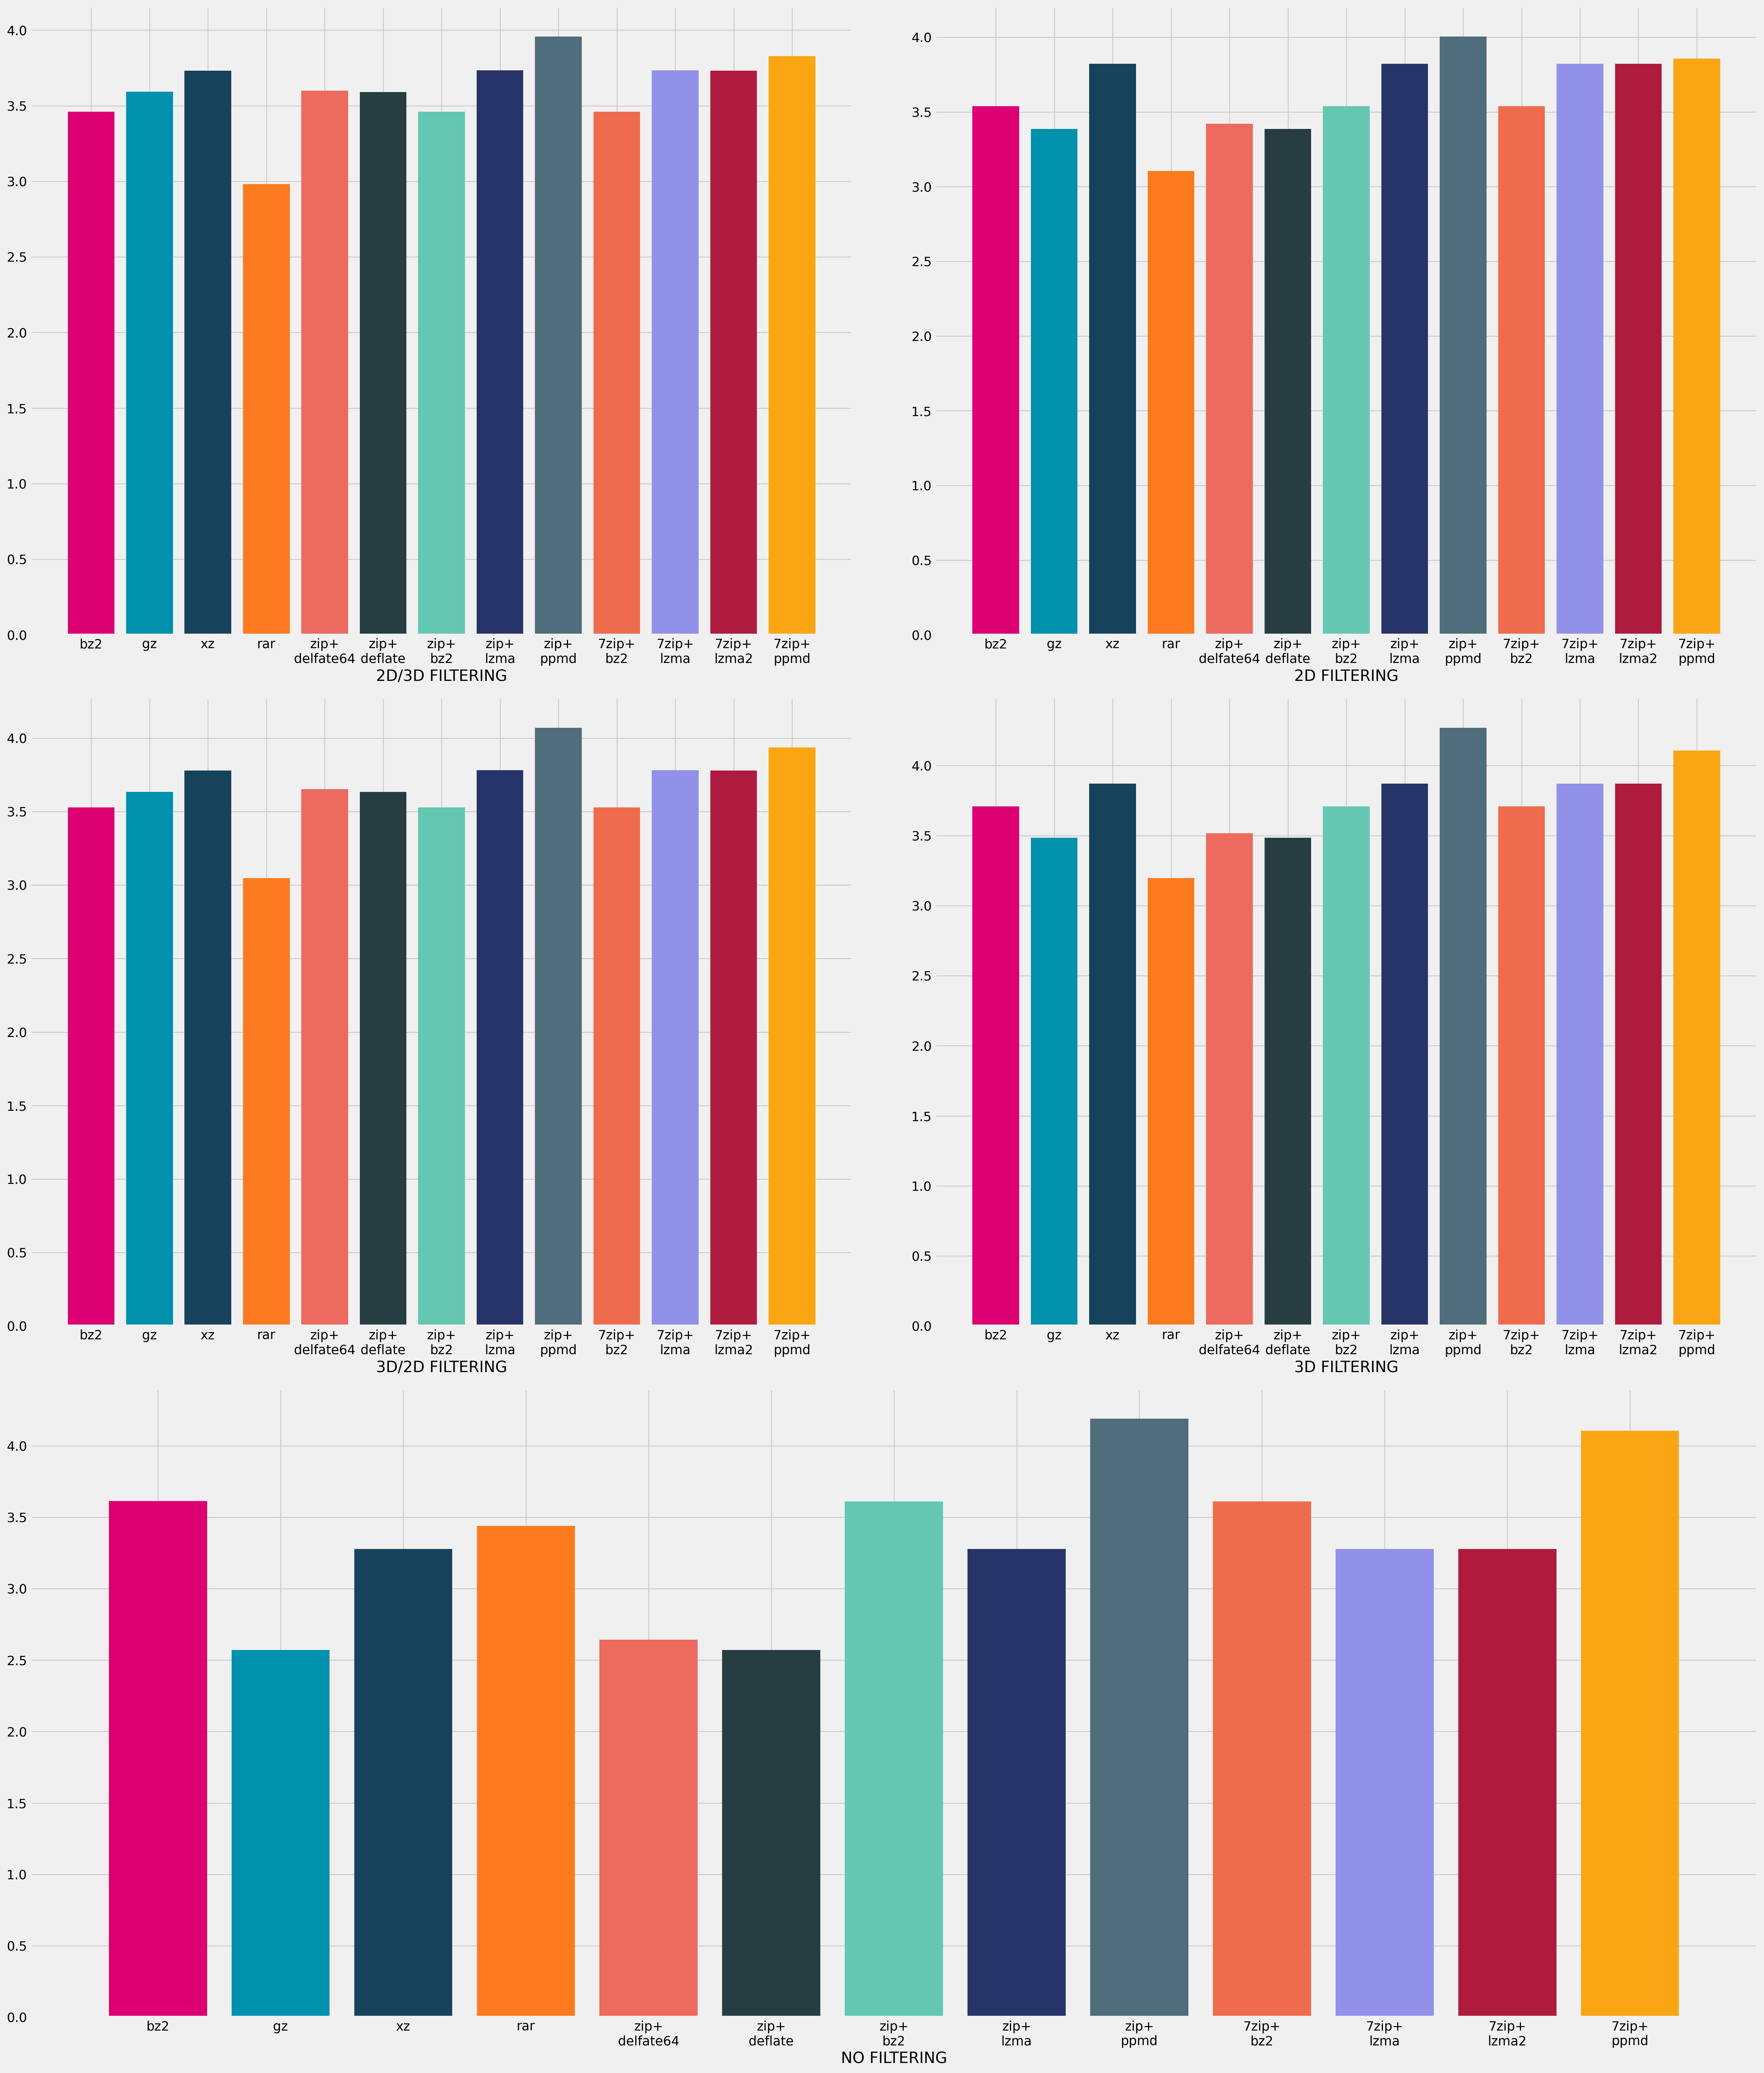

In [316]:
plt.figure(figsize=(2880*2/192, 1440*5/192), dpi=192)
plt.style.use('fivethirtyeight')

algorithms = ["bz2", "gz", "xz", "rar", 
              "zip+\ndelfate64", "zip+\ndeflate", "zip+\nbz2", "zip+\nlzma", "zip+\nppmd", 
              "7zip+\nbz2", "7zip+\nlzma", "7zip+\nlzma2", "7zip+\nppmd"]

colors = ["#DC0073", "#0091AD", "#16425B", "#FC7A1E", "#ED6A5E", "#263D42", "#63C7B2", "#273469", "#4F6D7A", "#EE6C4D", "#9191E9", "#AF1B3F", "#FAA613"]
''' "2D-3D", "2D", "3D-2D", "3D", "None" '''

algo = []
for i in range(5):
    algo.append([bz2[i], gz[i], xz[i], rar[i],
          			 zip_deflate_64[i], zip_deflate[i], zip_bz2[i], zip_lzma[i], zip_ppmd[i],
          			 _7z_bz2[i], _7z_lzma[i], _7z_lzma2[i], _7z_ppmd[i]])

grid = plt.GridSpec(3, 2, wspace=0.1, hspace=0.1)
_2D_3D = plt.subplot(grid[0, 0])
_2D = plt.subplot(grid[0, 1])
_3D_2D = plt.subplot(grid[1, 0])
_3D = plt.subplot(grid[1, 1])
_None = plt.subplot(grid[2, :2])

_2D_3D.bar(algorithms, algo[0], color=colors); _2D_3D.set_xlabel("2D/3D FILTERING")
_2D.bar(algorithms, algo[1], color=colors); _2D.set_xlabel("2D FILTERING")
_3D_2D.bar(algorithms, algo[2], color=colors); _3D_2D.set_xlabel("3D/2D FILTERING")
_3D.bar(algorithms, algo[3], color=colors); _3D.set_xlabel("3D FILTERING")
_None.bar(algorithms, algo[4], color=colors); _None.set_xlabel("NO FILTERING")